In [1]:
# importing libraries
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from pandas_datareader import data as pdr

# Set matplotlib style
plt.style.use('seaborn')

In [3]:
# Set Today
Today = dt.datetime.today().strftime("%Y-%m-%d")

# download quotes
tickers = ['TLT', 'SPY']
Quotes = pd.DataFrame()
Start ='2002-12-15'
End = Today

for t in tickers:
    Quotes[t] = pdr.get_data_yahoo(t, start=Start, end=End)['Adj Close']

In [4]:
Quotes.tail()

,TLT,SPY
Date,,
2017-10-04,124.410004,253.160004
2017-10-05,123.940002,254.660004
2017-10-06,123.589996,254.369995
2017-10-09,123.980003,253.949997
2017-10-10,124.193199,254.440002


In [5]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns + 1) - 1

In [6]:
daily_returns = Quotes.pct_change()

In [7]:
daily_returns.tail()

,TLT,SPY
Date,,
2017-10-04,0.000080,0.001186
2017-10-05,-0.003778,0.005925
2017-10-06,-0.002824,-0.001139
2017-10-09,0.003156,-0.001651
2017-10-10,0.001720,0.001930


In [8]:
rolling_annual_returns = daily_returns.rolling(252).apply(multi_period_return).mul(100)

In [9]:
rolling_annual_returns.tail()

,TLT,SPY
Date,,
2017-10-04,-5.824449,20.310556
2017-10-05,-5.741042,20.490203
2017-10-06,-5.480515,20.269345
2017-10-09,-5.245913,20.483957
2017-10-10,-4.519757,20.090948


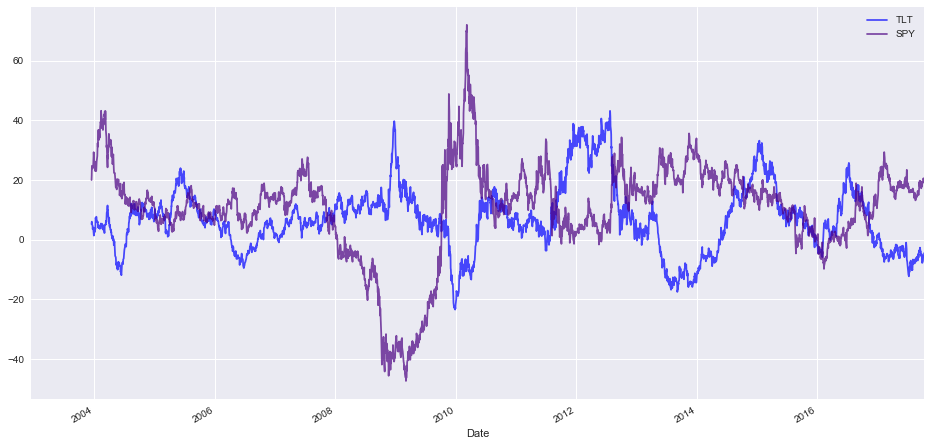

In [10]:
rolling_annual_returns.plot(figsize=(16, 8), color=('Blue', 'indigo'), alpha=0.7)
plt.show()